# Avacado Project
Description
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content: This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Understanding the Avocado Dataset

In [3]:
df.shape

(18249, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes.sort_values(ascending=False)

Date             object
type             object
region           object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
Unnamed: 0        int64
year              int64
dtype: object

In [6]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Unnamed: 0 

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
*******************************************************
*******************************************************
Value counts of Date 

27/12/2015    108
24/12/2017    108
10/12/2017    108
03/12/2017    108
26/11/2017    108
             ... 
06/11/2016    108
07/01/2018    108
18/06/2017    107
25/06/2017    107
06/12/2015    107
Name: Date, Length: 1

# DROPPING THE COLUMNS

In [7]:
df=df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(18249, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


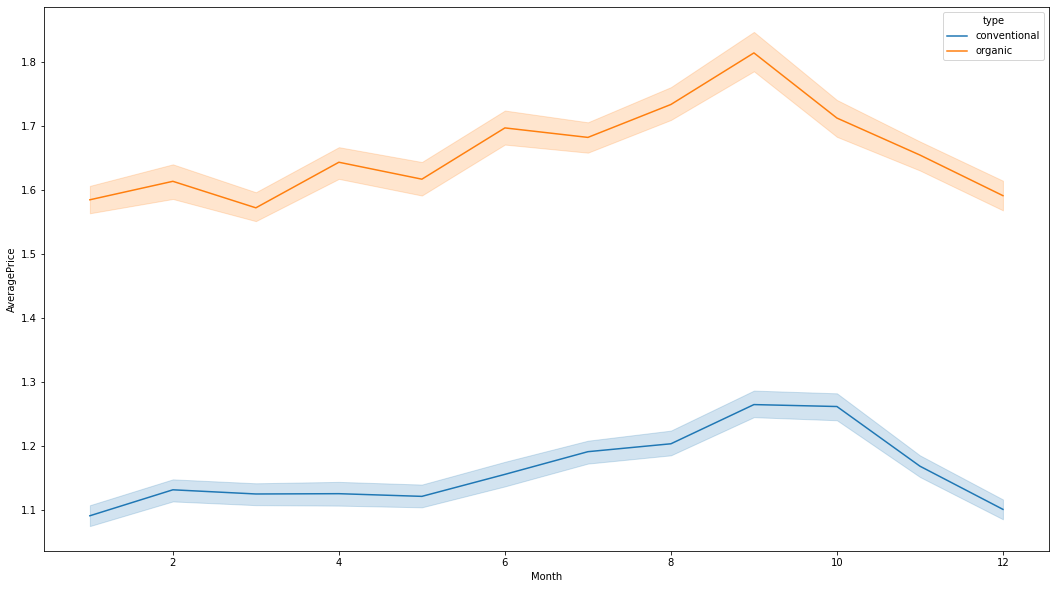

In [12]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

# plot Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

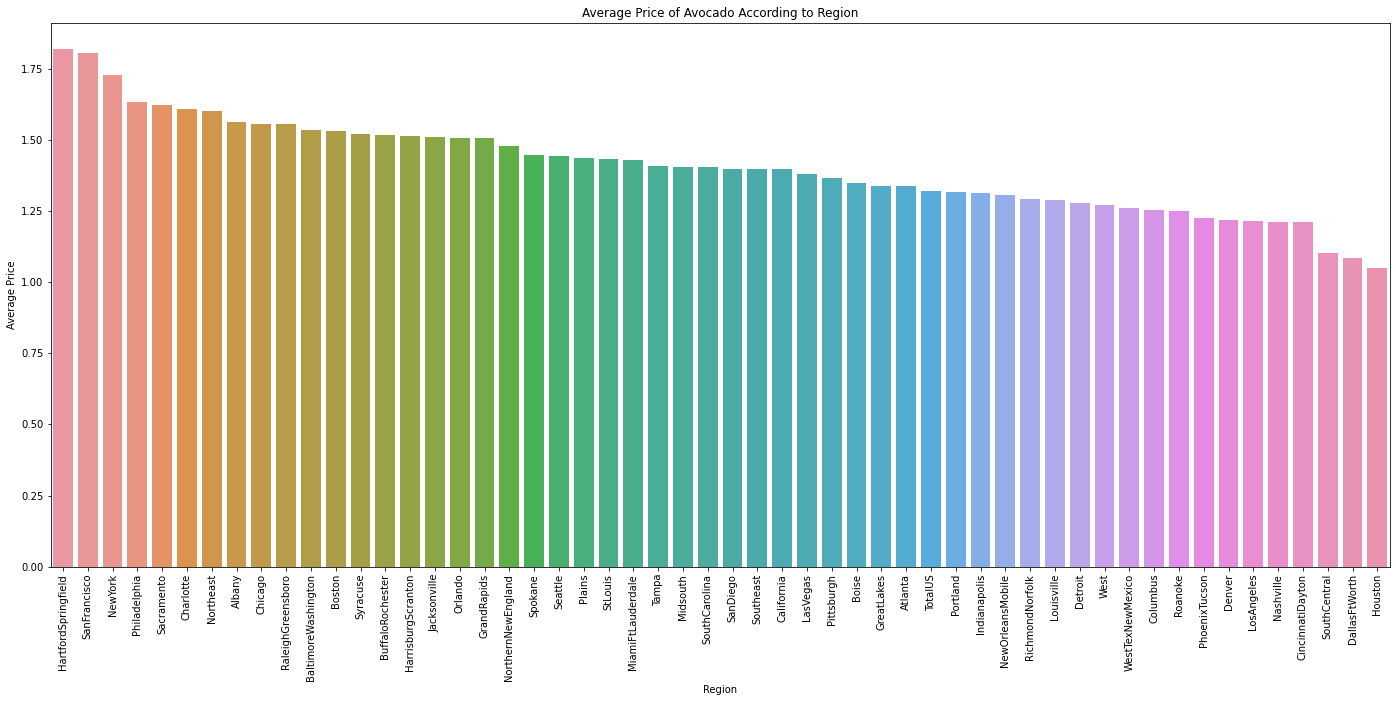

In [13]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# TOP 5 regions where Average consumption is very high

Text(0, 0.5, 'Average of Total Volume')

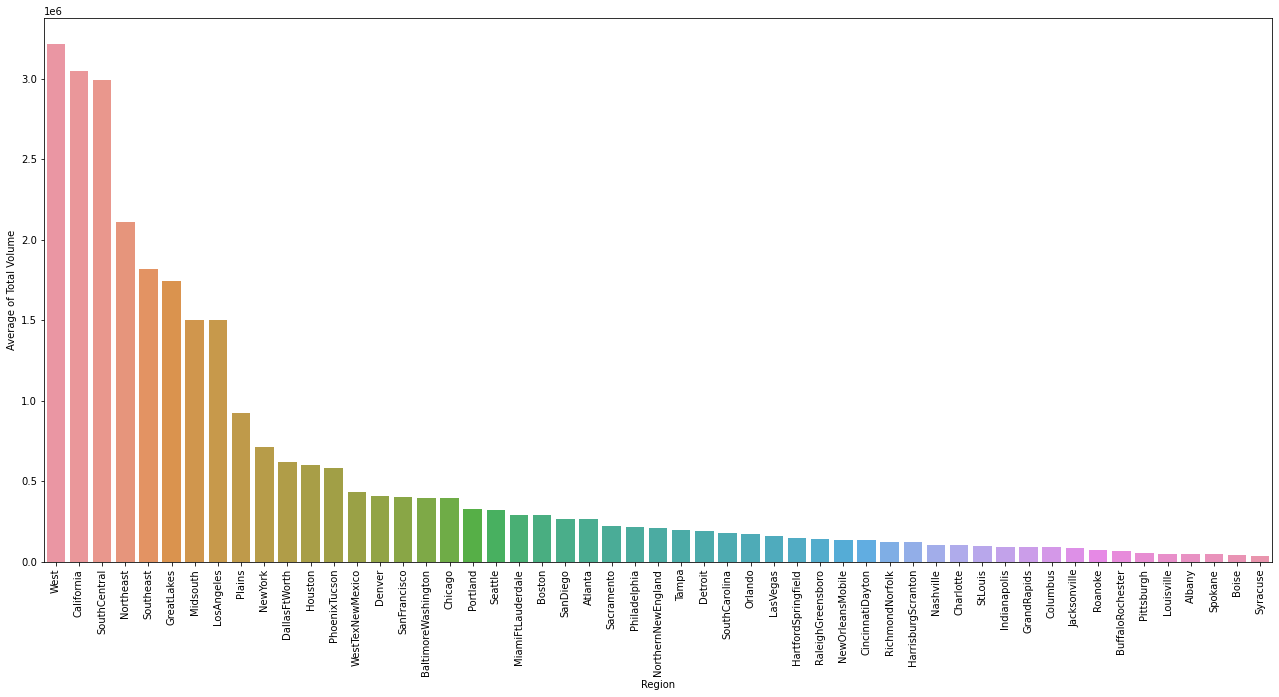

In [14]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')

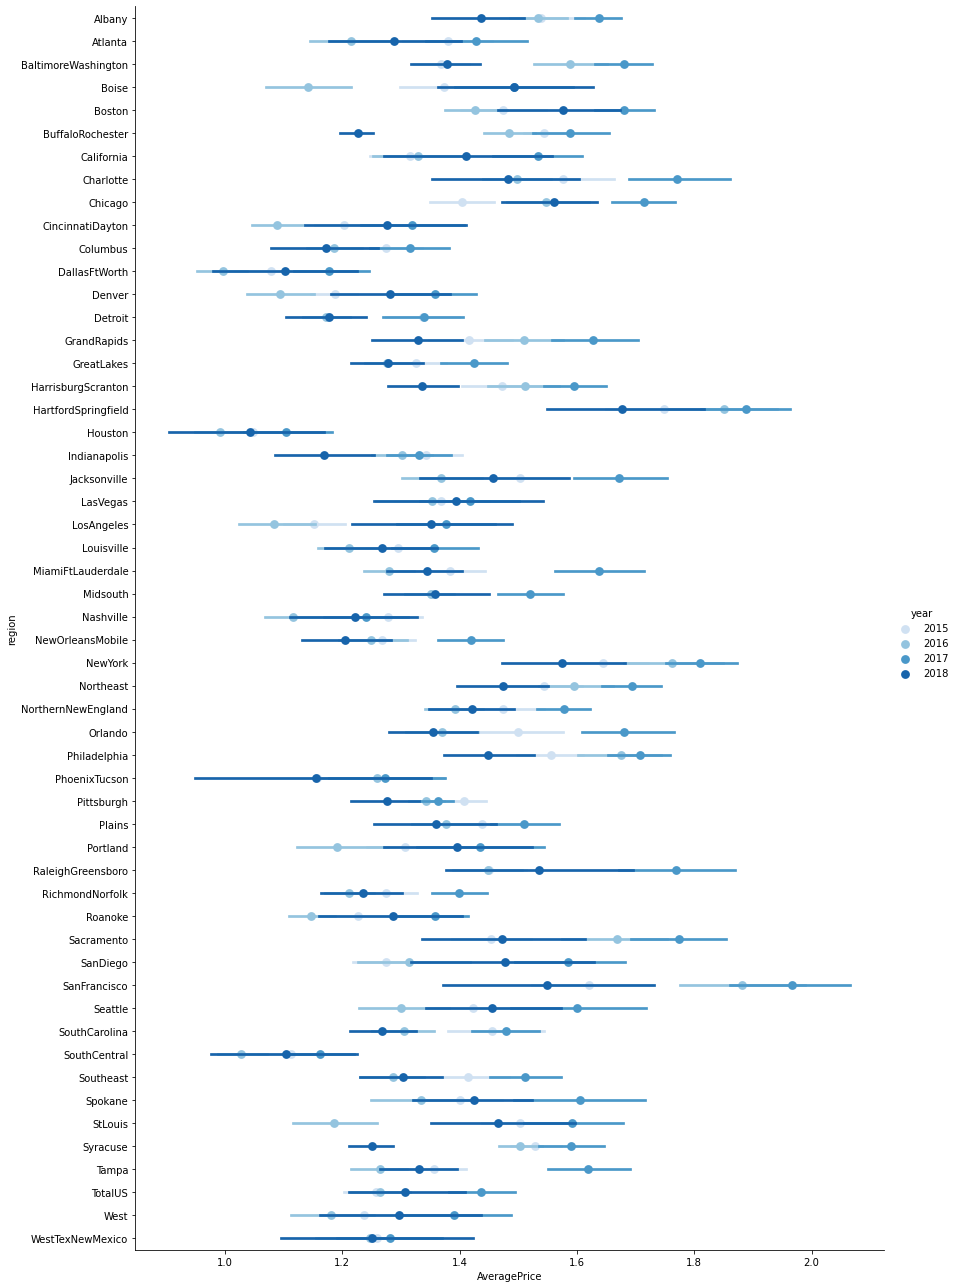

In [15]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,)

# how price is distributed over the date column

Text(0.5, 1.0, 'Average Price')

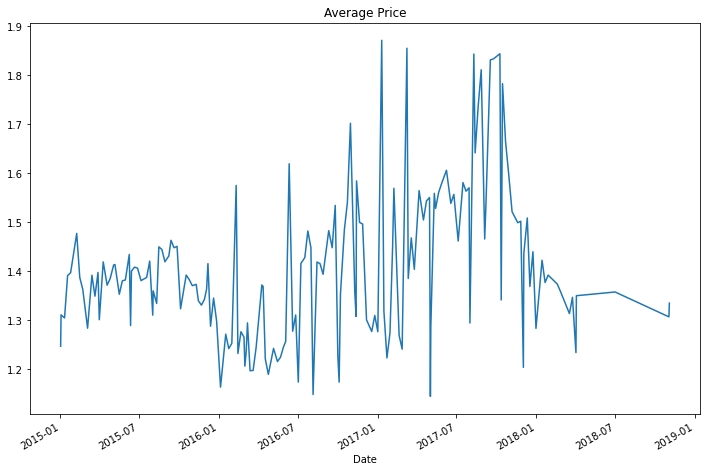

In [17]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

conventional    9126
organic         9123
Name: type, dtype: int64

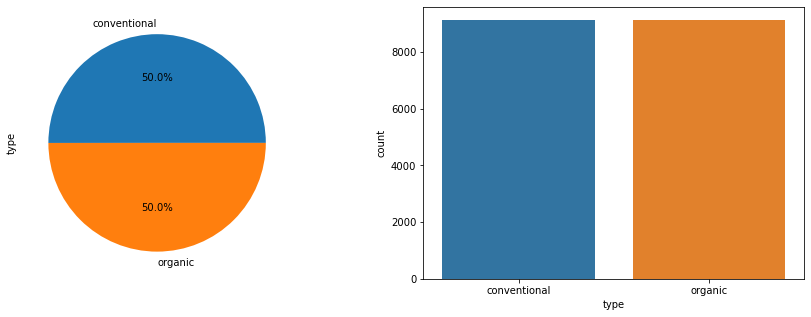

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

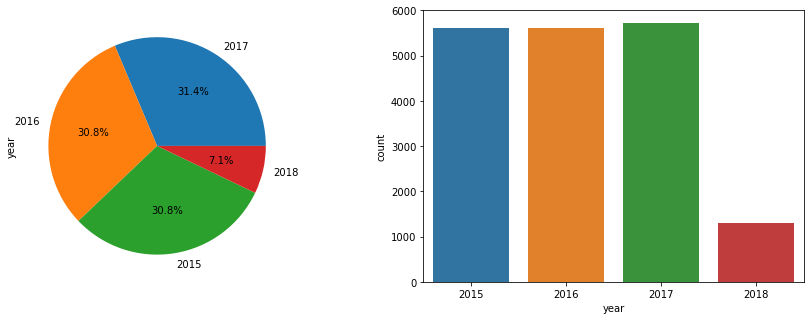

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


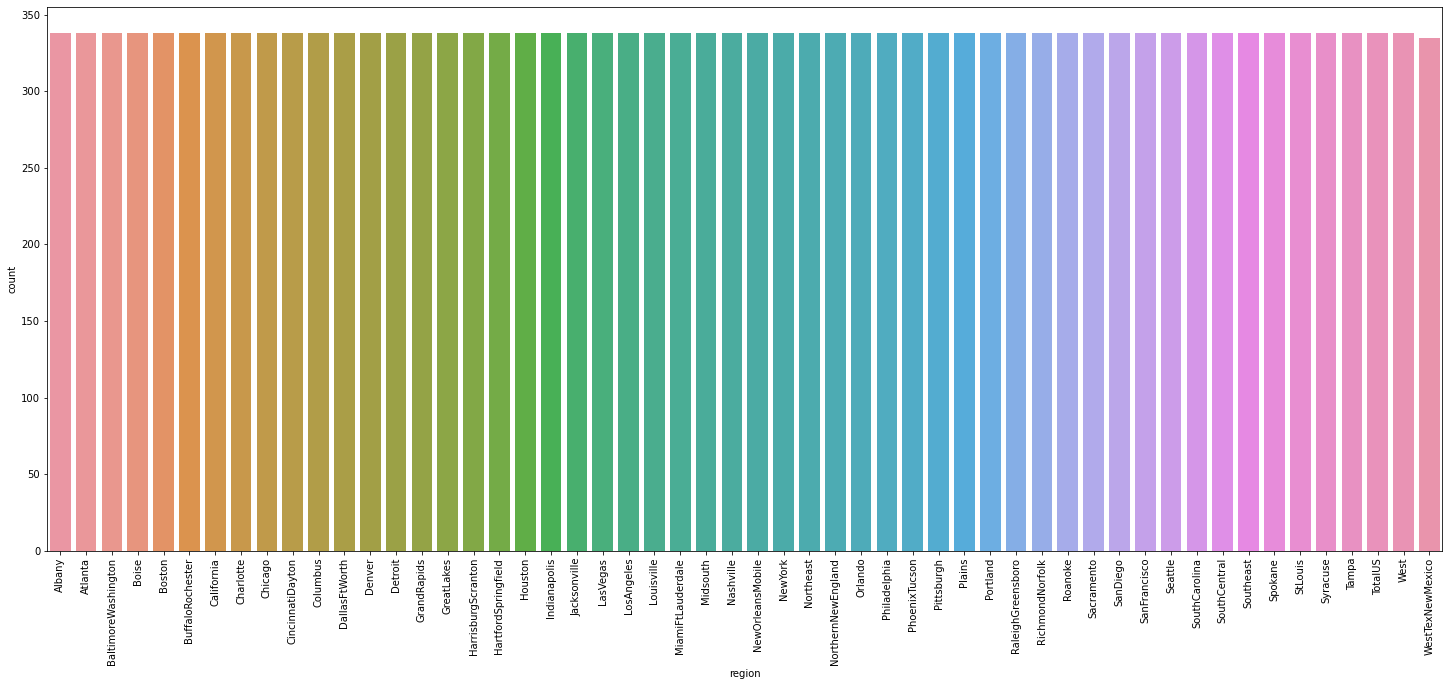

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

<AxesSubplot:xlabel='year', ylabel='region'>

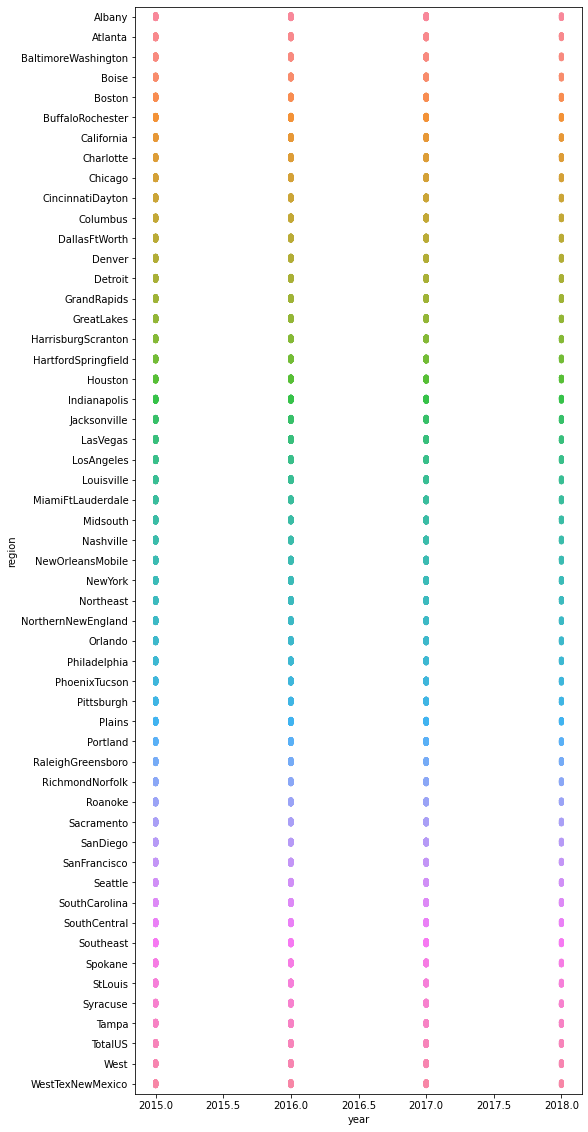

In [22]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

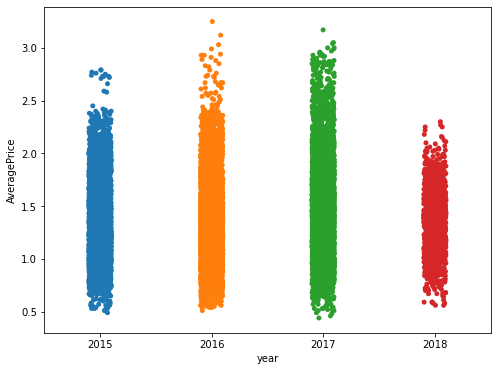

In [23]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

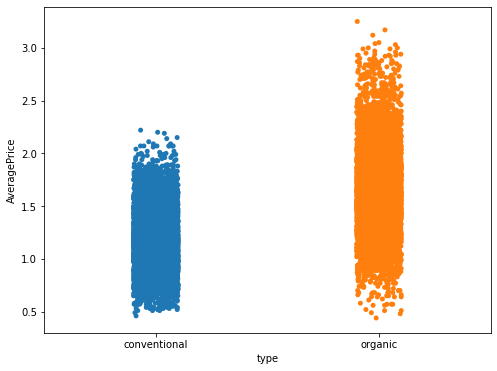

In [24]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

Organic Avacoados are more expensive than the conventional ones.

In [25]:
df.drop('Date',axis=1,inplace=True)

In [26]:
df['year'].replace(2015,1,inplace=True)
df['year'].replace(2016,2,inplace=True)
df['year'].replace(2017,3,inplace=True)
df['year'].replace(2018,4,inplace=True)

In [27]:
df['Time']=(df['year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['year','Month','Day'],axis=1,inplace=True)


In [28]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,557
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,1582
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1504


# ENCODING


In [29]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [30]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

In [31]:
df.rename(columns={'Total Volume': 'TotalVolume', '4046': 'f4046', '4225': 'f4225','4770': 'f4770', '4046': 'f4046','Total Bags': 'TotalBags', 'Small Bags': 'SmallBags', 'XLarge Bags': 'XLargeBags'}, inplace=True)

In [32]:
df

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,557
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,1582
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,1504


In [34]:
df.dtypes

AveragePrice    float64
TotalVolume     float64
f4046           float64
f4225           float64
f4770           float64
TotalBags       float64
SmallBags       float64
Large Bags      float64
XLargeBags      float64
type            float64
region          float64
Time              int64
dtype: object

In [35]:
df.duplicated().sum()

0

In [36]:
df.describe()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644,990.635213
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788,348.631004
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,397.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,696.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,984.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,1273.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,1793.000000


In [37]:
df.corr()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.116079
TotalVolume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.011924
f4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.001476
f4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.014603
f4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.043616
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.066227
SmallBags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.058919
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.081875
XLargeBags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.077806
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000028


<AxesSubplot:>

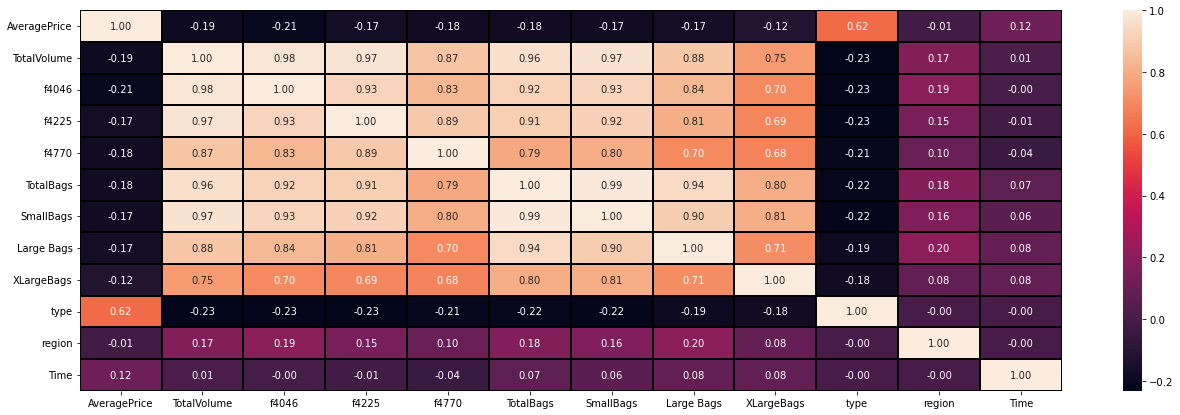

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [39]:
df2 = df 
df3 = df

# DIVIDE DATA INTO FEATURES & LABEL (REGRESSION)

In [40]:
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

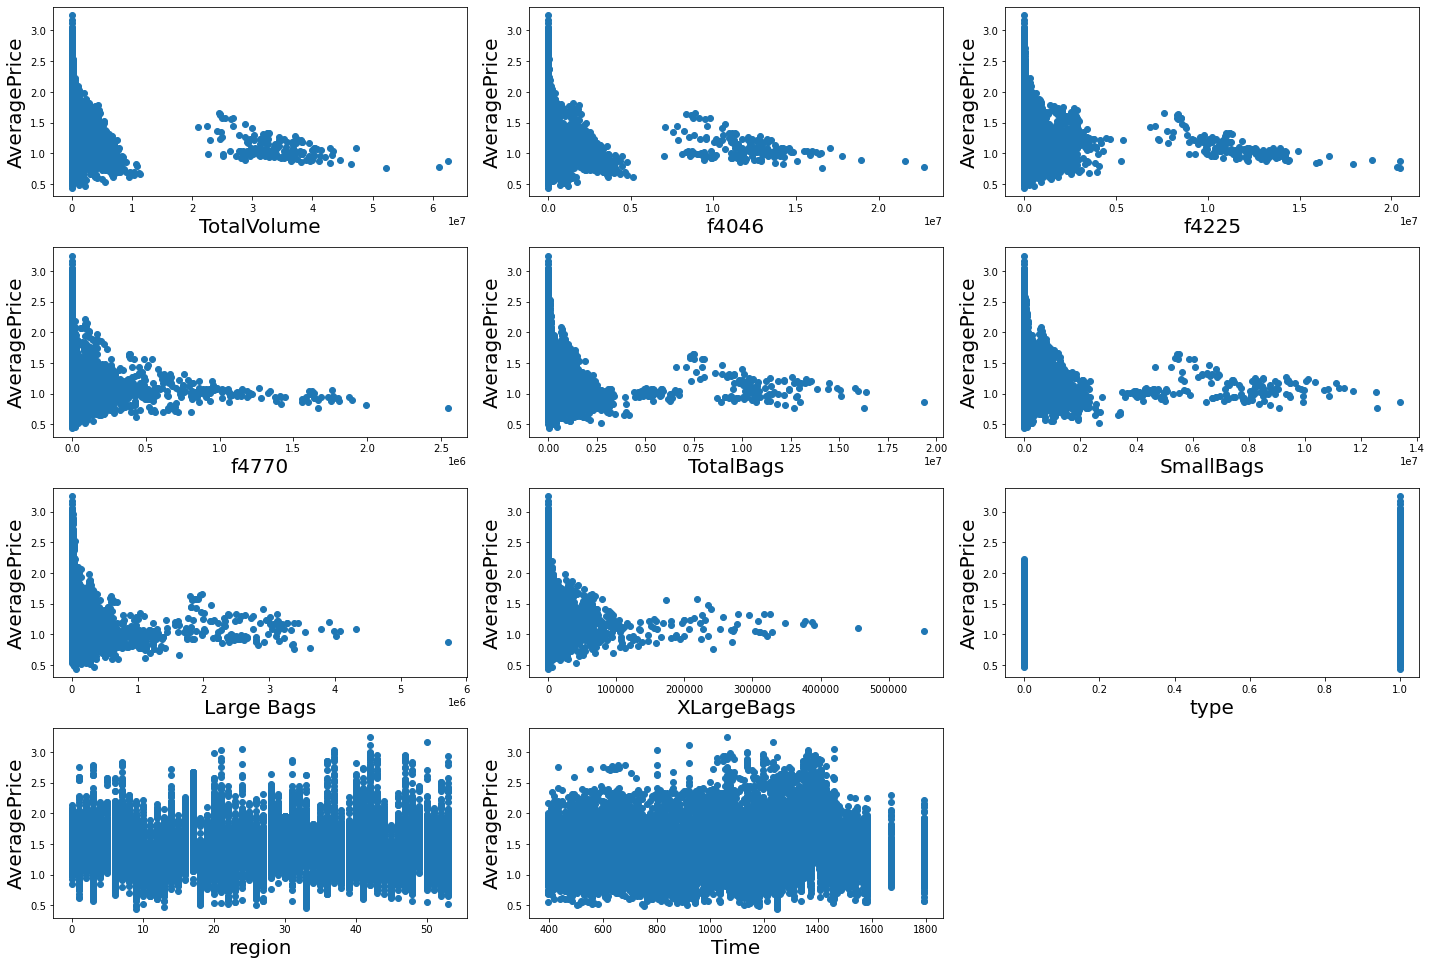

In [41]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice', fontsize=20)
    plotnumber+=1
plt.tight_layout()

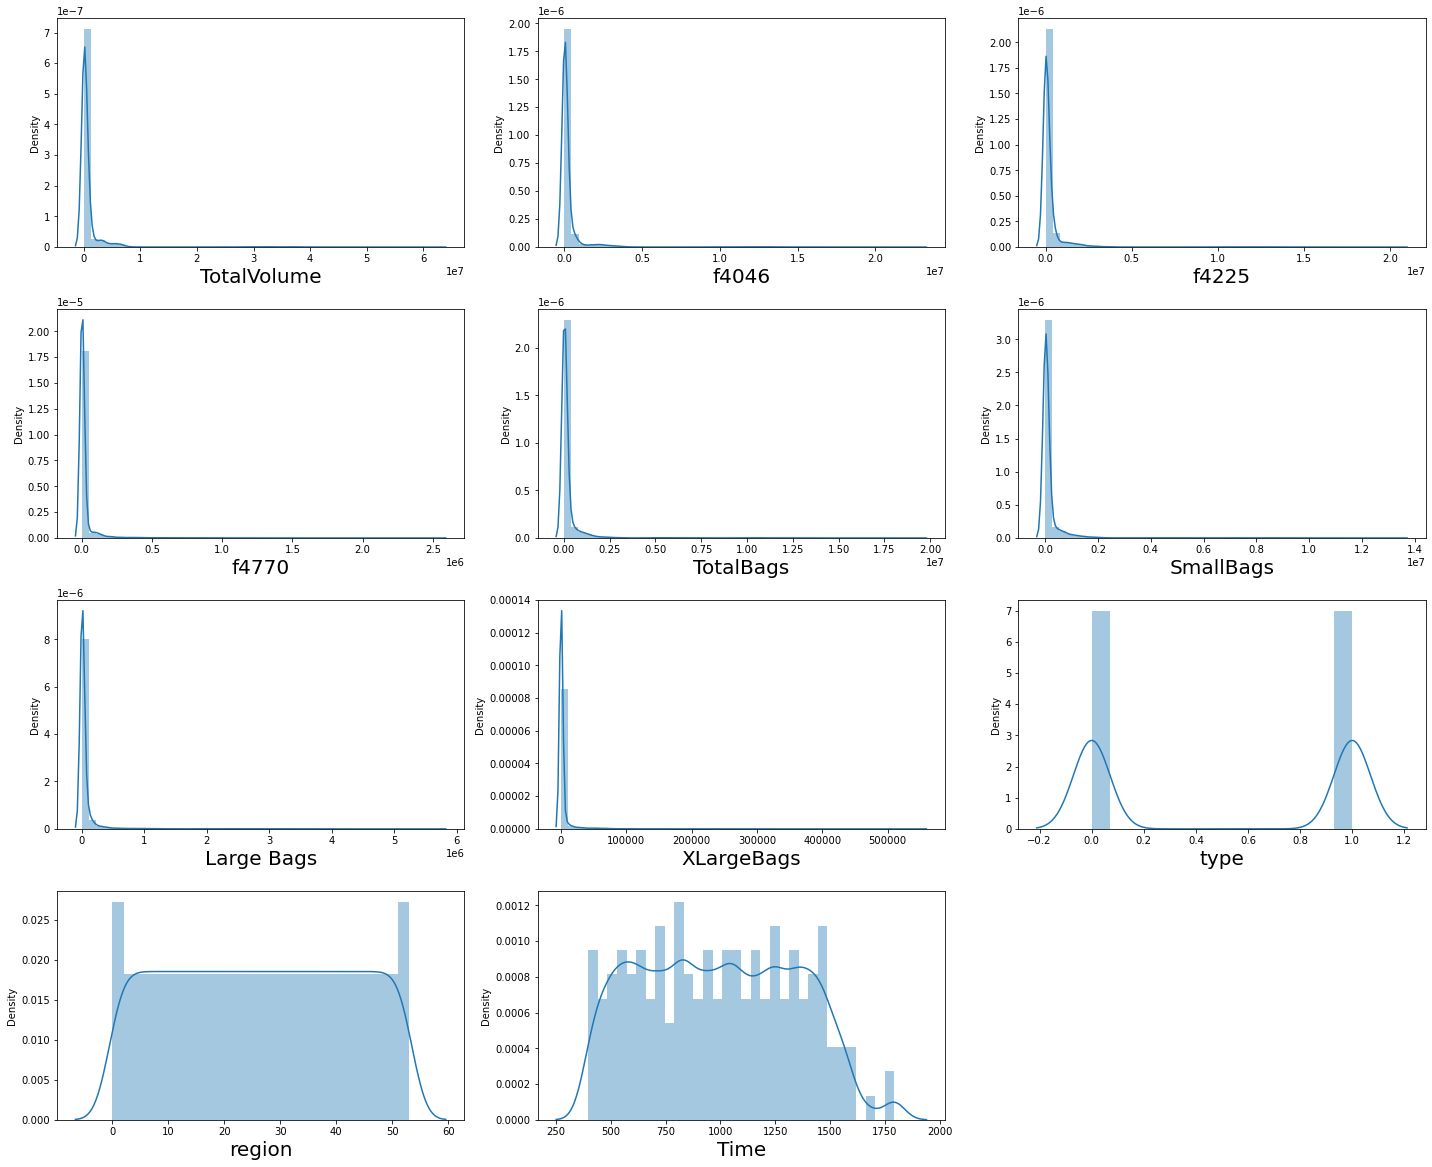

In [42]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [43]:
df2.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.102720
type             0.000329
region           0.000030
dtype: float64

In [44]:
from sklearn.preprocessing import power_transform
df2_new = power_transform(df2)
df2=pd.DataFrame(df2_new,columns=df2.columns)
df2.skew().sort_values(ascending=False)

XLargeBags      0.793520
f4770           0.032184
TotalVolume     0.011171
SmallBags       0.007058
AveragePrice    0.005596
type            0.000329
TotalBags      -0.001626
f4225          -0.017740
f4046          -0.022679
Large Bags     -0.073809
Time           -0.088178
region         -0.261443
dtype: float64

In [45]:
df2['AveragePrice'] = df['AveragePrice']

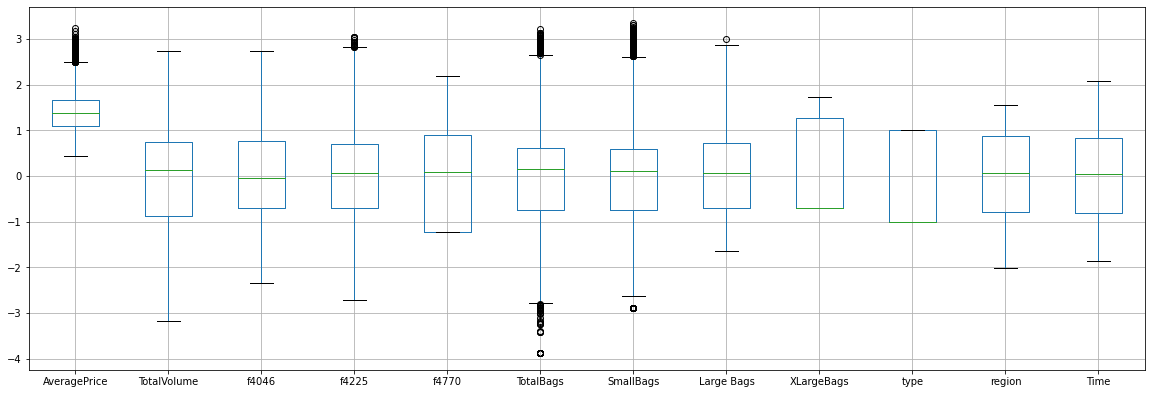

In [46]:
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z.shape

threshold=3
print(np.where(z>3))

df2_new=df2[(z<3).all(axis=1)]

df2_new.shape

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11320,
       11321, 11321, 11322, 11323, 11324, 11325, 11325, 11326, 11326,
       11327, 11328, 11329, 11330, 11331, 11332, 11332, 11333, 11336,
       11338, 11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387,
       11388, 11594

(18025, 12)

In [48]:
df2 = df2_new

In [49]:
print(((18249-18025)/18249)*100)

1.2274645186037592


In [50]:
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

In [51]:
scaler = StandardScaler()

In [52]:
xd=scaler.fit_transform(X)
X=pd.DataFrame(xd,columns=X.columns)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5461499765994939
At random state 0,the testing accuracy is:- 0.5158040603098444


At random state 1,the training accuracy is:- 0.5375585114668545
At random state 1,the testing accuracy is:- 0.5507270193155058


At random state 2,the training accuracy is:- 0.544614671964182
At random state 2,the testing accuracy is:- 0.522764124578216


At random state 3,the training accuracy is:- 0.5415473073248662
At random state 3,the testing accuracy is:- 0.5354145125119962


At random state 4,the training accuracy is:- 0.5385665619083723
At random state 4,the testing accuracy is:- 0.5464462521900021


At random state 5,the training accuracy is:- 0.54090924401837
At random state 5,the testing accuracy is:- 0.5378095054602018


At random state 6,the training accuracy is:- 0.5398151332858361
At random state 6,the testing accuracy is:- 0.5420574523178767


At random state 7,the training accuracy is:- 0.5400129827885352
At random state 7,the testing accurac

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [55]:
model_name=[]
r2_scores=[]
rmse_value=[]

# Building Machine Learning Models

In [56]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [57]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

52.27882032059705
MAE: 0.20764309260093342
MSE: 0.06957825915703346
RMSE: 0.2637769117209341


In [58]:
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value


Text(0, 0.5, 'Predicted Y')

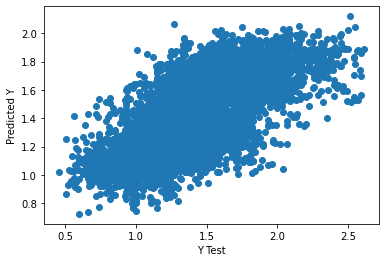

In [59]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [61]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

67.40733612729018
MAE: 0.14672707100591717
MSE: 0.04752063609467456
RMSE: 0.21799228448427838


In [62]:
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

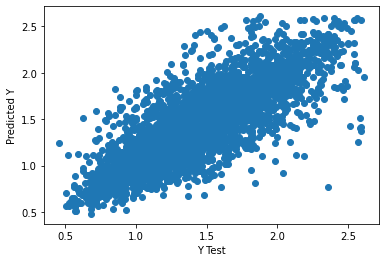

In [63]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [64]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)

In [65]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

83.55985595968967
MAE: 0.10800048076923074
MSE: 0.023969998443047334
RMSE: 0.15482247395984647


In [66]:
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

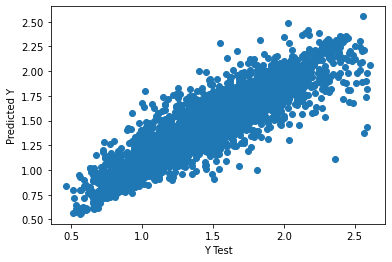

In [67]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [69]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

70.72989900226803
MAE: 0.15327626187822785
MSE: 0.042676285172634665
RMSE: 0.20658239318159394


In [70]:
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [71]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [72]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

51.71727361582042
MAE: 0.213495462376547
MSE: 0.07039700342145053
RMSE: 0.26532433627816826


In [73]:
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [74]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [75]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

87.78965436189583
MAE: 0.09621489761959341
MSE: 0.01780288330909916
RMSE: 0.13342744586140876


In [76]:
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [77]:
Regression_Scores

,Model Name,r2 Score,RMSE
0,Linear Regression,52.278820,0.263777
1,Decision Tree Regressor,67.407336,0.217992
2,Random Forest Regressor,83.559856,0.154822
3,SVR,70.729899,0.206582
4,ADA Boost,51.717274,0.265324
5,XGBoost,87.789654,0.133427


,Y Test,Y Pred
11291,1.45,1.760128
8454,0.83,0.845971
5803,1.21,1.183361
17266,1.58,1.849009
15571,1.84,1.541699


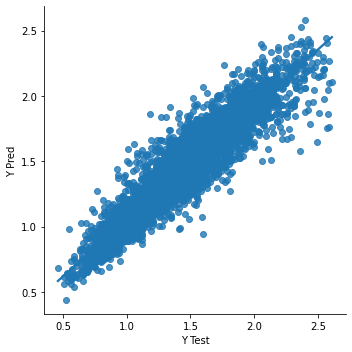

In [78]:
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

In [79]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,y,cv=5)
print("Cross validation score of Linear Regression Model", np.abs(scr.mean()))
scr1 = cross_val_score(ada,X,y,cv=5)
print("Cross validation score of Ada Boost Regressor Model", np.abs(scr1.mean()))
scr2 = cross_val_score(rdr,X,y,cv=5)
print("Cross validation score of Random Forest Regressor Model", np.abs(scr2.mean()))
scr3 = cross_val_score(xgb,X,y,cv=5)
print("Cross validation score of XGBoost Regression Model", np.abs(scr3.mean()))
scr4 = cross_val_score(dtr,X,y,cv=5)
print("Cross validation score of Decision Tree Model", np.abs(scr4.mean()))
scr5 = cross_val_score(svr,X,y,cv=5)
print("Cross validation score of SVR Model", np.abs(scr5.mean()))

Cross validation score of Linear Regression Model 0.21182475881208349
Cross validation score of Ada Boost Regressor Model 0.12142970232809432
Cross validation score of Random Forest Regressor Model 0.39141244259794916
Cross validation score of XGBoost Regression Model 0.50544367314672
Cross validation score of Decision Tree Model 0.16683980567521065
Cross validation score of SVR Model 0.11706229958633144


# Removing multicollinearity ussing L1 Regularisation

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(X,y)
print(m1.best_params_)

{'alpha': 0.001}


In [84]:
m1=Lasso(alpha=0.001)
m1.fit(X,y)

Lasso(alpha=0.001)

In [85]:
importance = np.abs(m1.coef_)

In [86]:
dfcolumns = pd.DataFrame(X.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,TotalBags,0.233541
0,TotalVolume,0.232093
2,f4225,0.231672
8,type,0.177797
5,SmallBags,0.171197
10,Time,0.086537
6,Large Bags,0.046850
3,f4770,0.025347
9,region,0.011645
7,XLargeBags,0.004702


In [87]:
X.drop(columns =['f4046', 'XLargeBags'],inplace=True)

In [88]:
X.columns

Index(['TotalVolume', 'f4225', 'f4770', 'TotalBags', 'SmallBags', 'Large Bags',
       'type', 'region', 'Time'],
      dtype='object')

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [90]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [91]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [92]:
g.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
  

In [93]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
{'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
0.8600529517636615


In [94]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.0,learning_rate=0.1,max_depth=10,min_child_weight=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=cross_val_score(model,X,y,cv=10)

In [95]:
print('Mean Absolute Error is',np.round(mean_absolute_error(y_pred,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(y_pred,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(y_pred,y_test)),4))
print('R2 Score is',np.round(r2_score(y_pred,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.097
Mean Squared Error is 0.018
Root Mean Squared Error is 0.1341
R2 Score is 84.24000000000001
Mean of cross validaton Score is 55.4503


Text(0.5, 1.0, 'XGBRegressor')

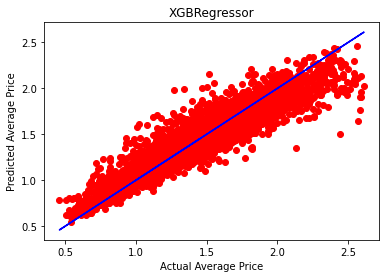

In [96]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')


# Saving the Model

In [97]:
import joblib
joblib.dump(model,'avacadoprice.obj')

['avacadoprice.obj']

# CLASSIFICATION TASK = FIND REGION

In [98]:
df.head()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,557
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724


# DIVIDE DATA INTO FEATURES & LABEL (CLASSFICATION)

In [99]:
X = df3.drop(columns=['region'])
y = df3['region']

In [100]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=9)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns = ['Feaure_Name','Score']

print(feature_scores.nlargest(11,'Score'))

     Feaure_Name       Score
1    TotalVolume  319.035278
3          f4225  308.834412
6      SmallBags  298.998145
2          f4046  295.483768
5      TotalBags  295.176645
7     Large Bags  254.735012
4          f4770  208.050643
8     XLargeBags  123.297554
0   AveragePrice   69.383811
9           type    0.000496
10          Time    0.000014


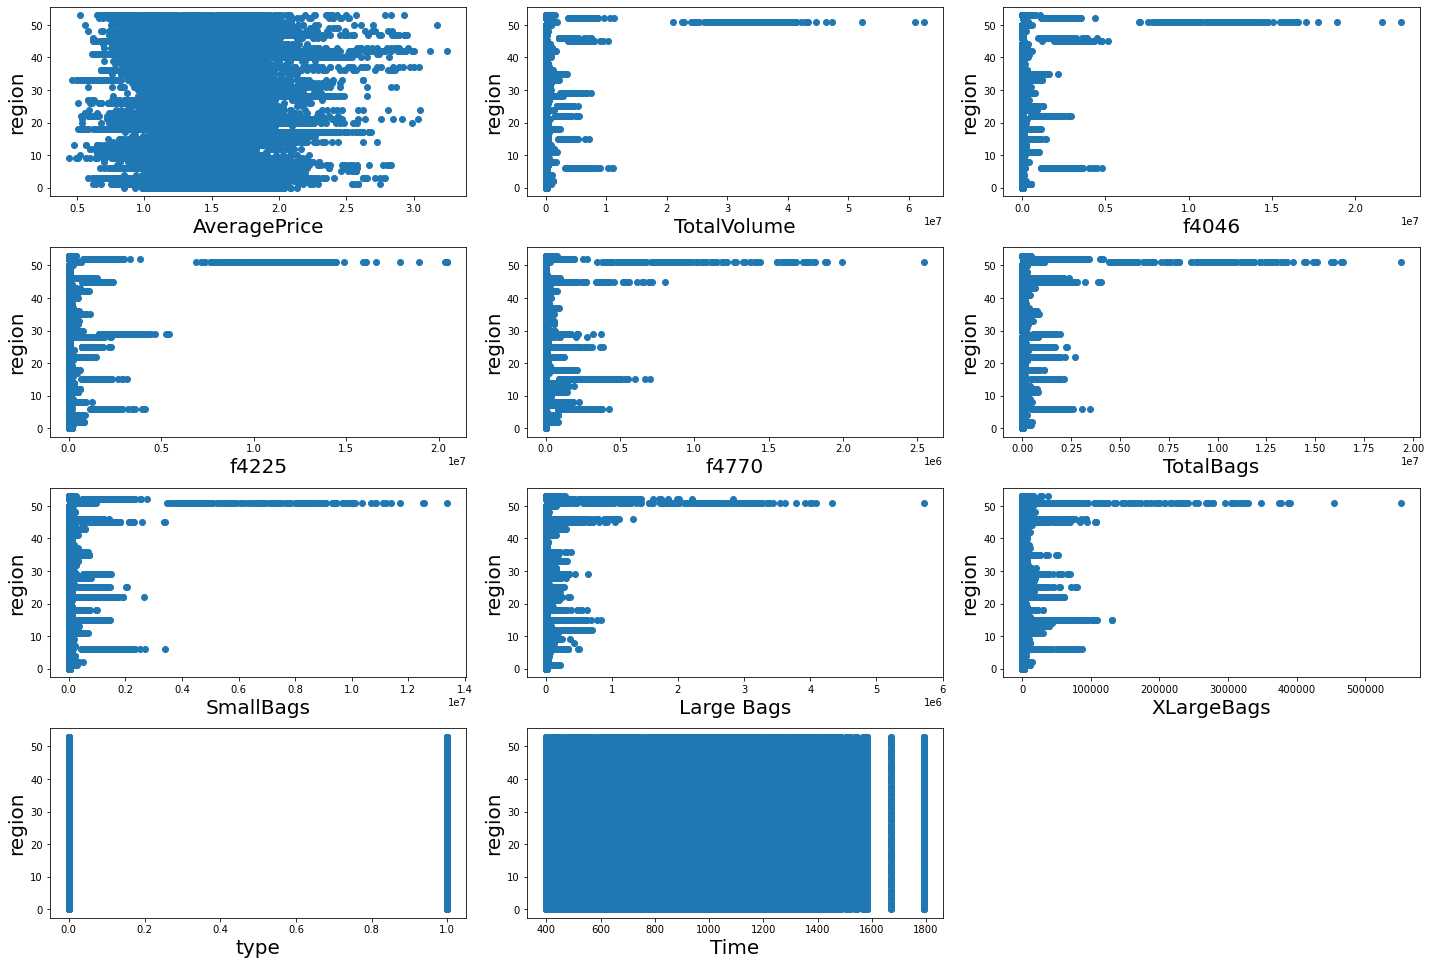

In [101]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('region', fontsize=20)
    plotnumber+=1
plt.tight_layout()

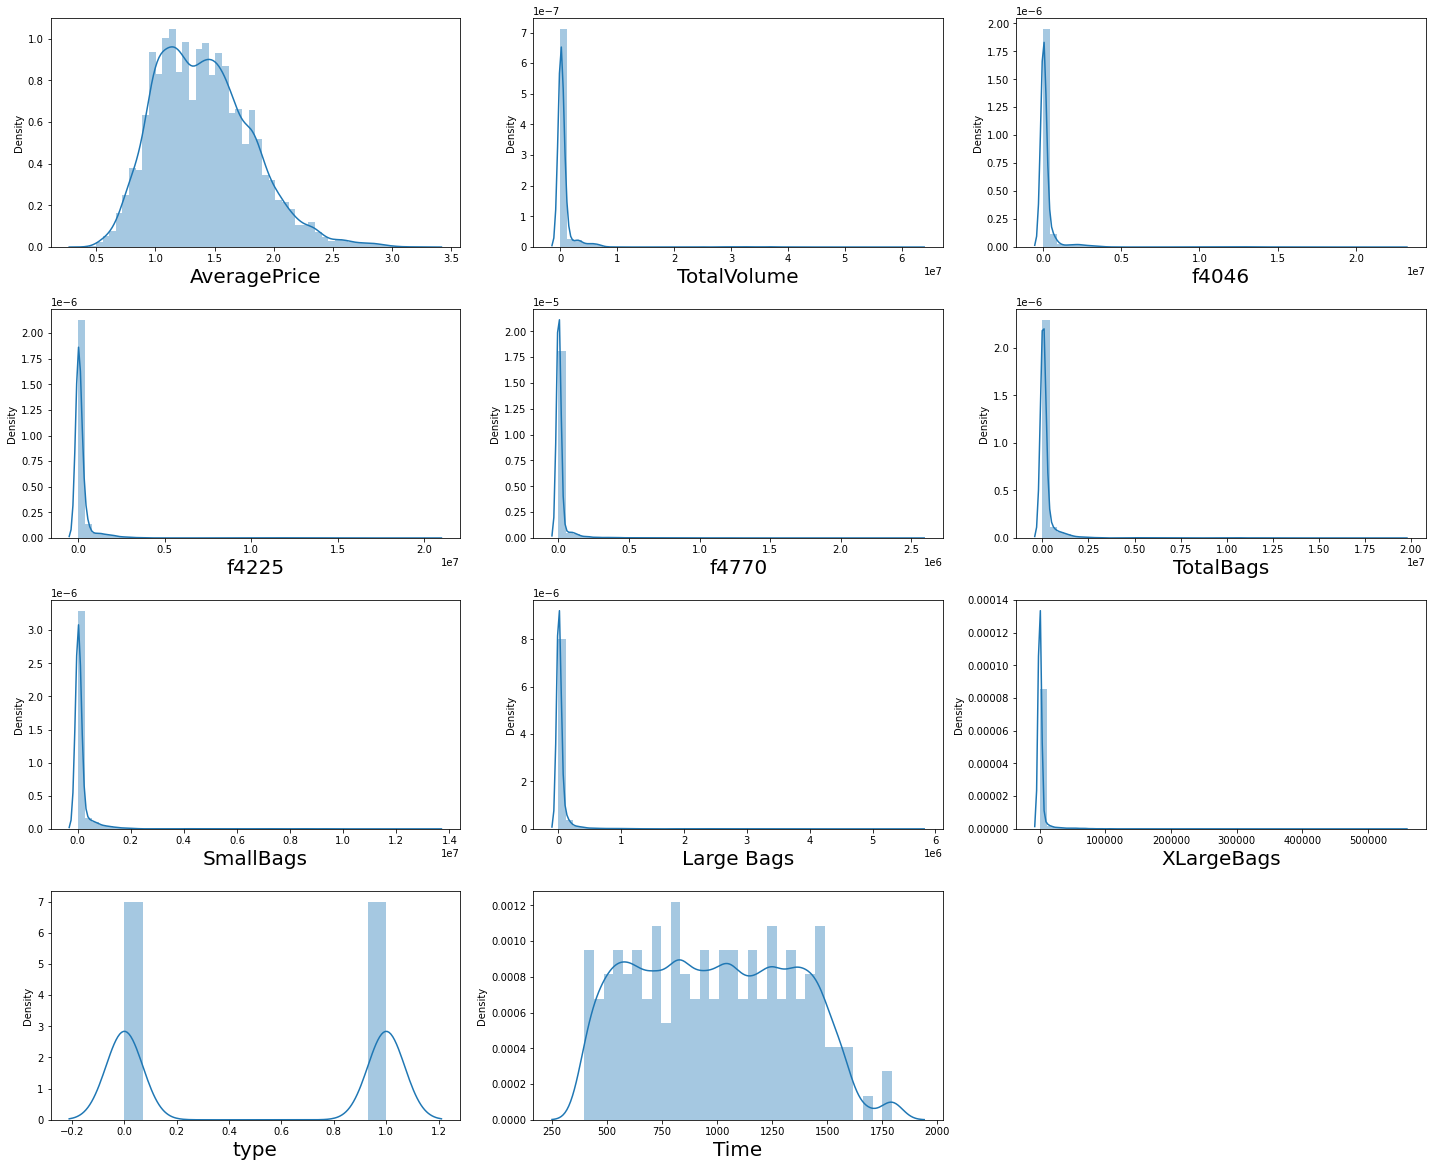

In [102]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [103]:
df3.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.102720
type             0.000329
region           0.000030
dtype: float64

In [104]:
from sklearn.preprocessing import power_transform
df3_new = power_transform(df3)
df3=pd.DataFrame(df2_new,columns=df3.columns)
df3.skew().sort_values(ascending=False)

XLargeBags      0.795095
AveragePrice    0.395941
f4770           0.013167
type            0.010098
TotalBags      -0.012773
TotalVolume    -0.034321
SmallBags      -0.061312
f4046          -0.067598
Time           -0.079534
f4225          -0.080231
Large Bags     -0.125273
region         -0.251530
dtype: float64

In [105]:
df3['region'] = df['region'] 
X = df3.drop(columns=['region'])
y = df3['region']

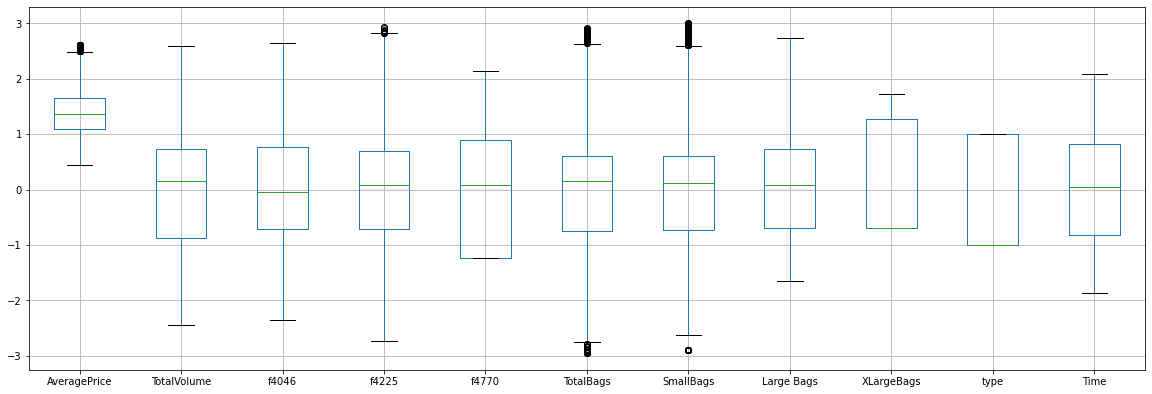

In [106]:
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [107]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
z.shape

threshold=3
print(np.where(z>3))

df3_new=df3[(z<3).all(axis=1)]

df3_new.shape

(array([ 5459,  5460,  5461,  5470,  5471,  5472,  5474,  5475,  5476,
        5477,  5478,  5479,  5480,  5482,  8293,  8294,  8295,  8298,
        8299, 10264, 11242, 11244, 11247, 11248, 11257, 12150, 12718,
       13904, 14000, 14001, 14567, 14674, 14676, 14677, 14678, 14889,
       14890, 14999, 15516, 15519, 15524, 15528, 15658, 15659, 15713,
       15894, 16496, 16556, 16750, 16803, 16809, 16811, 16812, 16813,
       16815, 16817, 16818, 16821, 16834, 16835, 16836, 16837, 17041,
       17209, 17210]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 0, 5,
       5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


(17960, 12)

In [108]:
print(((18249-17960)/18249)*100)

1.583648419091457


# Dividing into Feature & Label (Classification)

In [109]:
X = df3.drop(columns=['region'])
y = df3['region']

0.0     338
19.0    338
23.0    338
25.0    338
26.0    338
29.0    338
30.0    338
32.0    338
34.0    338
35.0    338
38.0    338
39.0    338
44.0    338
45.0    338
46.0    338
49.0    338
52.0    338
22.0    338
27.0    338
18.0    338
13.0    338
4.0     338
8.0     338
9.0     338
10.0    338
11.0    338
6.0     338
12.0    338
5.0     338
15.0    338
16.0    338
2.0     338
28.0    337
20.0    337
1.0     336
33.0    336
50.0    336
40.0    336
41.0    336
14.0    335
31.0    335
24.0    334
21.0    333
48.0    332
53.0    332
7.0     332
17.0    331
36.0    329
3.0     328
37.0    328
43.0    324
47.0    322
42.0    290
51.0    270
Name: region, dtype: int64


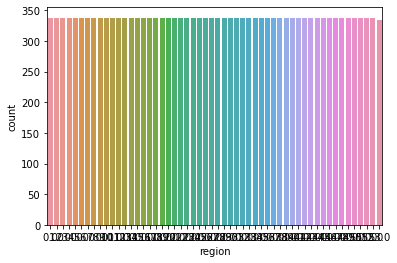

In [110]:
ax=sns.countplot(x="region", data=df)
print(df3['region'].value_counts())

# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [111]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.5532544378698225 on Random State 18


In [113]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=111)

In [116]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 54.51183431952663
[[60  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  8]
 ...
 [ 0  0  0 ... 65  2  0]
 [ 0  0  0 ...  1 95  0]
 [ 0  6  0 ...  0  0 22]]
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66        91
         1.0       0.19      0.31      0.24       101
         2.0       0.68      0.64      0.66        98
         3.0       0.59      0.43      0.50        91
         4.0       0.54      0.53      0.54       104
         5.0       0.61      0.52      0.56        94
         6.0       0.86      0.94      0.90       111
         7.0       0.65      0.70      0.67       104
         8.0       0.72      0.80      0.76       116
         9.0       0.50      0.77      0.61       104
        10.0       0.59      0.44      0.50       110
        11.0       0.60      0.68      0.64       103
        12.0       0.46      0.49      0.47       107
        13.0       0.37      0.25      0.30       105
      

In [117]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 80.26997041420118
[[71  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  1]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  1  0 ...  0 99  0]
 [ 0  2  0 ...  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76        91
         1.0       0.78      0.76      0.77       101
         2.0       0.93      0.91      0.92        98
         3.0       0.81      0.71      0.76        91
         4.0       0.90      0.90      0.90       104
         5.0       0.66      0.71      0.69        94
         6.0       0.92      0.93      0.92       111
         7.0       0.77      0.83      0.80       104
         8.0       0.88      0.98      0.93       116
         9.0       0.75      0.80      0.77       104
        10.0       0.79      0.64      0.70       110
        11.0       0.88      0.82      0.84       103
        12.0       0.84      0.81      0.83       107
        13.0       0.72      0.74      0.73       105
      

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 90.32914201183432
[[ 85   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 110   0]
 [  0   1   0 ...   0   0  73]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        91
         1.0       0.82      0.90      0.86       101
         2.0       0.96      0.98      0.97        98
         3.0       0.92      0.84      0.87        91
         4.0       0.94      0.99      0.97       104
         5.0       0.82      0.80      0.81        94
         6.0       0.99      0.98      0.99       111
         7.0       0.88      0.89      0.89       104
         8.0       0.95      0.99      0.97       116
         9.0       0.89      0.89      0.89       104
        10.0       0.92      0.88      0.90       110
        11.0       0.92      0.93      0.93       103
        12.0       0.97      0.96      0.97       107
        13.0       0.87 

In [119]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 80.54733727810651
[[ 87   0   0 ...   0   0   0]
 [  0  51   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 106   0]
 [  0   3   1 ...   0   0  60]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        91
         1.0       0.47      0.50      0.49       101
         2.0       0.96      0.94      0.95        98
         3.0       0.87      0.74      0.80        91
         4.0       0.90      0.86      0.88       104
         5.0       0.84      0.71      0.77        94
         6.0       0.98      0.98      0.98       111
         7.0       0.81      0.76      0.78       104
         8.0       0.94      0.97      0.96       116
         9.0       0.64      0.85      0.73       104
        10.0       0.67      0.76      0.71       110
        11.0       0.85      0.83      0.84       103
        12.0       0.95      0.95      0.95       107
        13.0       0.62 

In [120]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_knn)
cr=classification_report(y_test,y_pred_knn,digits=2)
print("Accuracy", accuracy_score(y_test,y_pred_knn)*100)
print(cfm)
print(cr)

Accuracy 83.33949704142012
[[ 87   0   0 ...   0   0   0]
 [  0  67   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   3   1 ...   0   0  70]]
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        91
         1.0       0.59      0.66      0.63       101
         2.0       0.95      0.96      0.95        98
         3.0       0.85      0.81      0.83        91
         4.0       0.90      0.92      0.91       104
         5.0       0.77      0.84      0.80        94
         6.0       0.96      0.98      0.97       111
         7.0       0.79      0.83      0.81       104
         8.0       0.91      0.95      0.93       116
         9.0       0.69      0.76      0.72       104
        10.0       0.70      0.82      0.75       110
        11.0       0.83      0.89      0.86       103
        12.0       0.95      0.91      0.93       107
        13.0       0.69 

SUMMARY:

LOGISTIC REGRESSION: ACCURACY SCORE= 55.32
DECISION TREE CLASSIFIER: ACCURACY SCORE= 81.58
RANDOM FOREST CLASSIFIER: ACCURACY SCORE= 90.97
SVC: ACCURACY SCORE= 81.02
KNN : ACCURACY SCORE = 86.03

In [122]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())
scr5 = cross_val_score(knn,X,y,cv=5)
print("Cross validation score of KNN Model", scr5.mean())

Cross validation score of Logistic Regression Model 0.3996116504854369
Cross validation score of Random Forest Model 0.6922607489597781
Cross validation score of Decision Tree Model 0.5622746185852983
Cross validation score of SVC Model 0.6468238557558947
Cross validation score of KNN Model 0.592732316227462


# Concluding Remarks

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 Conf Mat =>
 [[ 90   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  93   0   0]
 [  0   0   0 ...   0 110   0]
 [  0   1   4 ...   0   0  78]]

 Accuracy rf Normal => 0.8579881656804734
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       110
         1.0       0.83      0.79      0.81       109
         2.0       0.86      0.95      0.91       107
         3.0       0.89      0.76      0.82        97
         4.0       0.93      0.81      0.87       111
         5.0       0.81      0.72      0.76       101
         6.0       0.93      0.95      0.94       105
         7.0       0.85      0.89      0.87        99
         8.0       0.95      0.98      0.96        92
         9.0       0.77      0.87      0.82        99
        10.0       0.81      0.

# Saving the Model

In [124]:
import joblib
joblib.dump(clf,'avacadoregion.obj')

['avacadoregion.obj']